In [1]:
import numpy as np
import ROOT
from matplotlib import pyplot as plt

from ROOT import gStyle
gStyle.SetOptStat(0)

Welcome to JupyROOT 6.22/06



RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



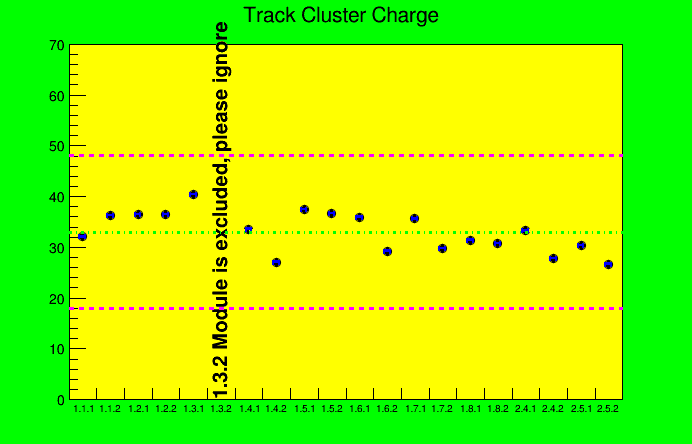

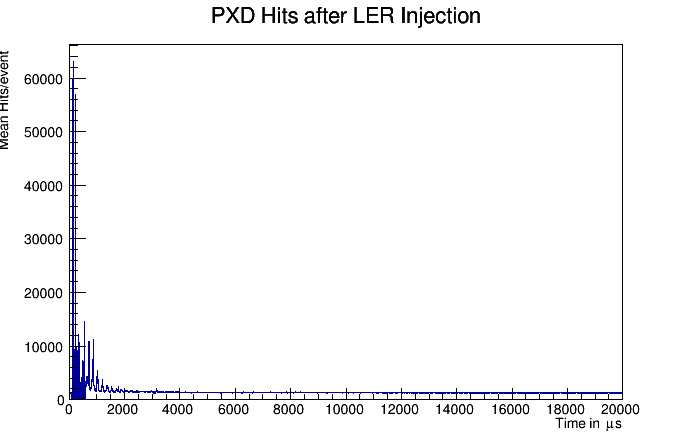

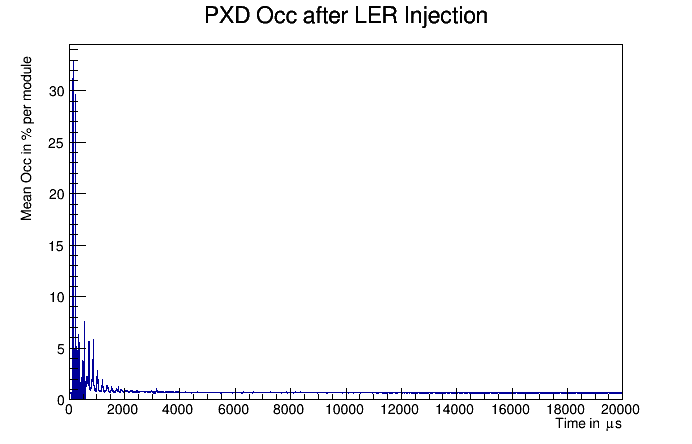

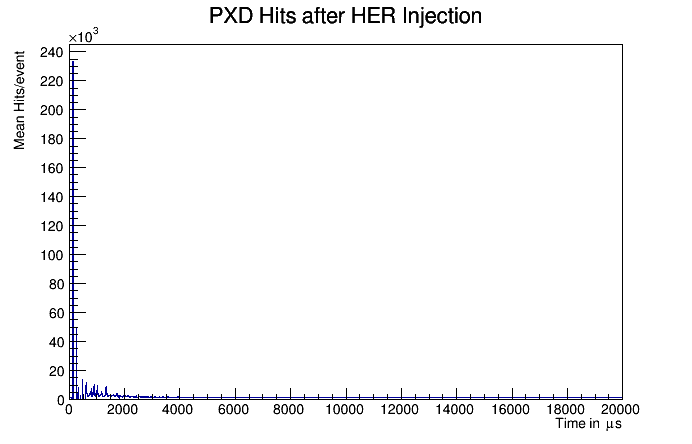

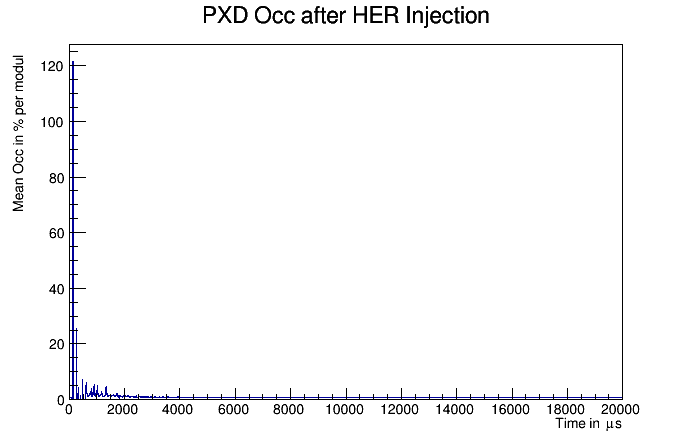

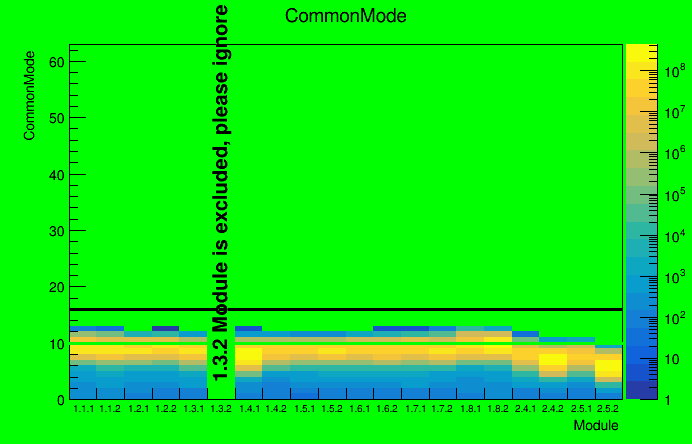

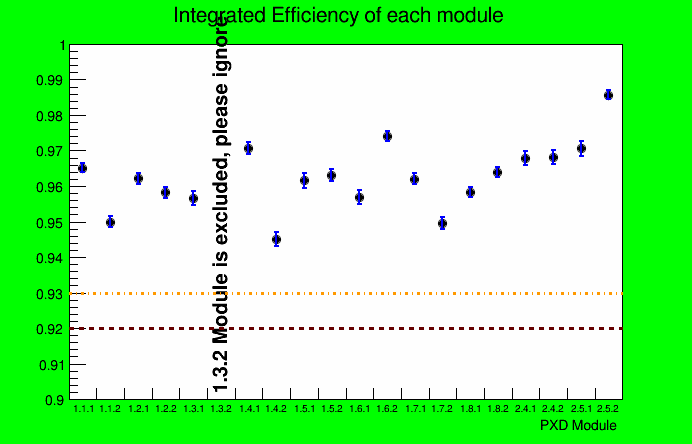

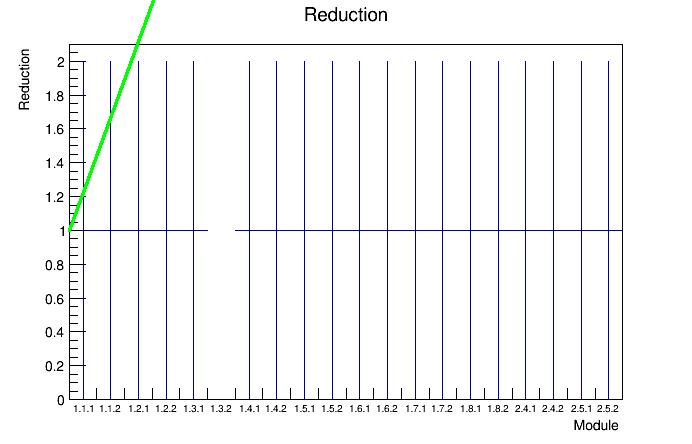

In [3]:
## Draw PXD DQM canvases

expnr = 16
runnr = 899
f = ROOT.TFile.Open("/home/ye/dqm/dqm_e%04ir%06i_canvas.root"%(expnr,runnr),"READ")

#for key in f.GetListOfKeys():
#    print 'key: %s points to an object of class: %s at %s'%(key.ReadObj().GetName(), key.GetClassName(), key.GetSeekKey())

pxddqm = ["PXDEFF/c_EffAll", "PXDDAQ/c_CommonMode", "PXDDAQ/c_Reduction", "PXDER/c_TrackCharge",
          "PXDINJ/c_InjectionLERPXD", "PXDINJ/c_InjectionLERPXDOcc",
          "PXDINJ/c_InjectionHERPXD", "PXDINJ/c_InjectionHERPXDOcc"]

dirlist = f.GetListOfKeys()
iterator = dirlist.MakeIterator()
key = iterator.Next()

while key:
    if key.GetClassName() == 'TCanvas' and key.ReadObj().GetName() in pxddqm:
        canv = key.ReadObj()
        canv.Draw()
    key = iterator.Next()


In [82]:
## extract the PXD integrated efficiency from DQM plot

# expnr = 14
# runnr = 1786
# f = ROOT.TFile.Open("/home/ye/dqm/data_e00%i/dqm_e%04ir%06i_canvas.root"%(expnr,expnr,runnr),"READ")
expnr = 16
runnr = 899
f = ROOT.TFile.Open("/home/ye/dqm/dqm_e%04ir%06i_canvas.root"%(expnr,runnr),"READ")

canv = f.GetKey("PXDEFF/c_EffAll").ReadObj()
#canv.Draw()

for item in canv.GetListOfPrimitives():
    print(item.GetName(), item.ClassName(), item.GetTitle())

eff = canv.GetPrimitive("eff_graph")

nbins = eff.GetN()
xlabels = eff.GetXaxis().GetLabels()
x = eff.GetX()
y = eff.GetY()
eyhigh = eff.GetEYhigh()
eylow = eff.GetEYlow()
for i in range(eff.GetN()):
    print('%s : %.4f + %.4f - %.4f'%(xlabels[i], y[i], eyhigh[i], eylow[i]))


TFrame TFrame Pad graphics frame
eff_graph TGraphAsymmErrors Integrated Efficiency of each module
 TLatex  1.3.2 Module is excluded, please ignore
title TPaveText PaveText. A Pave with several lines of text.
TLine TLine A line segment
TLine TLine A line segment
1.1.1 : 0.9652 + 0.0013 - 0.0013
1.1.2 : 0.9500 + 0.0015 - 0.0016
1.2.1 : 0.9622 + 0.0015 - 0.0015
1.2.2 : 0.9583 + 0.0015 - 0.0016
1.3.1 : 0.9566 + 0.0018 - 0.0019
1.3.2 : 0.0000 + 0.0001 - 0.0000
1.4.1 : 0.9708 + 0.0017 - 0.0018
1.4.2 : 0.9452 + 0.0020 - 0.0020
1.5.1 : 0.9616 + 0.0020 - 0.0020
1.5.2 : 0.9631 + 0.0016 - 0.0017
1.6.1 : 0.9570 + 0.0020 - 0.0020
1.6.2 : 0.9742 + 0.0013 - 0.0014
1.7.1 : 0.9621 + 0.0016 - 0.0017
1.7.2 : 0.9496 + 0.0017 - 0.0017
1.8.1 : 0.9583 + 0.0015 - 0.0015
1.8.2 : 0.9640 + 0.0013 - 0.0014
2.4.1 : 0.9680 + 0.0019 - 0.0020
2.4.2 : 0.9682 + 0.0018 - 0.0019
2.5.1 : 0.9706 + 0.0020 - 0.0021
2.5.2 : 0.9857 + 0.0013 - 0.0014


In [6]:
## extract the PXD track cluster charge from DQM plot

# expnr = 12
# runnr = 5039
# f = ROOT.TFile.Open("/data_fast/hye/dqm/dqm_e%04ir%06i_canvas.root"%(expnr,runnr),"READ")

canv = f.GetKey("PXDER/c_TrackCharge").ReadObj()
#canv.Draw()

for item in canv.GetListOfPrimitives():
    print(item.GetName(), item.ClassName(), item.GetTitle())

trkcharge = canv.GetPrimitive("Track_Cluster_Charge")

nbins = trkcharge.GetN()
xlabels = trkcharge.GetXaxis().GetLabels()
x = trkcharge.GetX()
y = trkcharge.GetY()
ey = trkcharge.GetEY()
for i in range(trkcharge.GetN()):
    print('%s : %.2f +/- %.2f'%(xlabels[int(x[i])], y[i], ey[i]))


TFrame TFrame Pad graphics frame
Track_Cluster_Charge TGraphErrors Track Cluster Charge
 TLatex 1.3.2 Module is excluded, please ignore
title TPaveText PaveText. A Pave with several lines of text.
TLine TLine A line segment
TLine TLine A line segment
TLine TLine A line segment
1.1.1 : 32.06 +/- 0.03
1.1.2 : 36.23 +/- 0.04
1.2.1 : 36.51 +/- 0.04
1.2.2 : 36.50 +/- 0.04
1.3.1 : 40.37 +/- 0.04
1.4.1 : 33.59 +/- 0.05
1.4.2 : 27.07 +/- 0.05
1.5.1 : 37.41 +/- 0.05
1.5.2 : 36.67 +/- 0.04
1.6.1 : 35.97 +/- 0.06
1.6.2 : 29.24 +/- 0.06
1.7.1 : 35.65 +/- 0.06
1.7.2 : 29.74 +/- 0.04
1.8.1 : 31.44 +/- 0.03
1.8.2 : 30.72 +/- 0.04
2.4.1 : 33.23 +/- 0.04
2.4.2 : 27.82 +/- 0.05
2.5.1 : 30.41 +/- 0.04
2.5.2 : 26.69 +/- 0.07


frame_46840c40 TH1D PXD Track Cluster Charge 1_5_1 sw3 dcd2 
lxg_paramBox TPaveText PaveText. A Pave with several lines of text.
h_PXDER/PXD_Track_Cluster_Charge_1_5_1_sw3_dcd2 RooHist Histogram of PXDER/PXD_Track_Cluster_Charge_1_5_1_sw3_dcd2_plot__x
lxg_Norm[x]_Range[signal]_NormRange[signal] RooCurve Projection of lxg
frame_46840c40 TH1D PXD Track Cluster Charge 1_5_1 sw3 dcd2 
['Name:  Title: ml =  37.915 #pm 0.073', 'Name:  Title: sg =  5.12 #pm 0.10', 'Name:  Title: sl =  2.897 #pm 0.068', 'Name:  Title: x =  50.00']


Error in <TList::Clear>: A list is accessing an object (0x1536db8d0) already deleted (list name = TList)


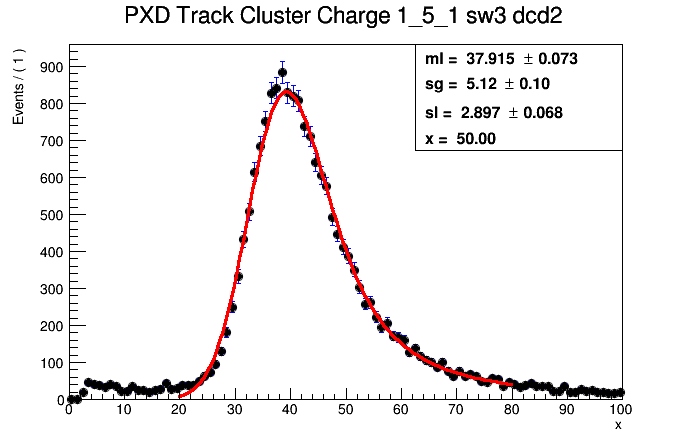

In [80]:
## extract the PXD track cluster charge from DQM plot

expnr = 16
runnr = 904
f = ROOT.TFile.Open("/home/ye/HY_pxd_scripts/trk_cluster_charge/dqm.belle2.org/past_runs/expreco_exp16_canvas/dqm_e%04ir%06i_canvas.root"%(expnr,runnr),"READ")

canv = f.GetKey("PXDER/c_Fit_PXD_Track_Cluster_Charge_1_5_1_s3_d2").ReadObj()
canv.Draw()

for item in canv.GetListOfPrimitives():
    print(item.GetName(), item.ClassName(), item.GetTitle())

trkcharge = canv.GetPrimitive("h_PXDER/PXD_Track_Cluster_Charge_1_5_1_sw3_dcd2")
paras = canv.GetPrimitive("lxg_paramBox")

print([str(t) for t in paras.GetListOfLines()])

# c0 = ROOT.TCanvas('c0','c0')
# c0.Draw()

# paras.Draw()

# trkcharge.Draw()
